In [377]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
plt.style.use('ggplot')

In [404]:
url_weimar = 'https://raw.githubusercontent.com/jessems/WeimarInflationData/master/weimar_inflation_data.csv'
weimar_df = pd.read_csv(url_weimar)
weimar_df['Day'] = weimar_df['Day'].astype(str)

In [405]:
url_btc = 'https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1410912000&period2=' + datetime.now().strftime("%s") + '&interval=1d&events=history&includeAdjustedClose=true'
btc_data = pd.read_csv(url_btc)
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
btc_data = btc_data.set_index('Date')

In [407]:
btc_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [411]:
weimar_dates = pd.date_range(datetime(1918,1,1), datetime(1923,11,30), freq='D')
df_weimar_clean = pd.DataFrame({'Date': weimar_dates, 'Mark/Gold': np.zeros(len(weimar_dates))})
df_weimar_clean.head()
weimar_df['Mark/Gold'] = weimar_df['Mark']/weimar_df['Gold']

In [461]:
# Convert the data into a nice format

df_weimar_clean = pd.DataFrame({'Date': weimar_dates, 'Mark/Gold': np.zeros(len(weimar_dates))})
for i, r in df_weimar_clean.iterrows():
    current_date = r['Date']
    current_year = current_date.year # string
    current_month = current_date.strftime("%B") # string
    current_day = current_date.day # int
    for j, ro in weimar_df.iterrows():
        if((current_year == int(ro['Year'])) & (current_month == ro['Month']) & (str(current_day) == ro['Day'])):
            r['Mark/Gold'] = ro['Mark/Gold']
            df_weimar_clean.iloc[i] = r
        elif((current_year == int(ro['Year'])) & (current_month == ro['Month']) & ((current_day >= 1) & (current_day <= 10) & ('1-10' in ro['Day']))):
            r['Mark/Gold'] = ro['Mark/Gold']
            df_weimar_clean.iloc[i] = r
        elif((current_year == int(ro['Year'])) & (current_month == ro['Month']) & ((current_day >= 11) & (current_day <= 20) & ('11-20' in ro['Day']))):
            r['Mark/Gold'] = ro['Mark/Gold']
            df_weimar_clean.iloc[i] = r
        elif((current_year == int(ro['Year'])) & (current_month == ro['Month']) & ((current_day >= 21) & (current_day <= 31) & ('21-' in ro['Day']))):
            r['Mark/Gold'] = ro['Mark/Gold']
            df_weimar_clean.iloc[i] = r
        elif((current_year == int(ro['Year'])) & (current_month == ro['Month']) & (ro['Day'] == 'nan')):
            r['Mark/Gold'] = ro['Mark/Gold']
            df_weimar_clean.iloc[i] = r

df_weimar_clean['Mark/Gold'] = df_weimar_clean['Mark/Gold'].replace(0, np.nan)
df_weimar_clean = df_weimar_clean.set_index('Date')
df_weimar_clean = df_weimar_clean.interpolate()
df_weimar_clean.to_csv('weimar_processed.csv')

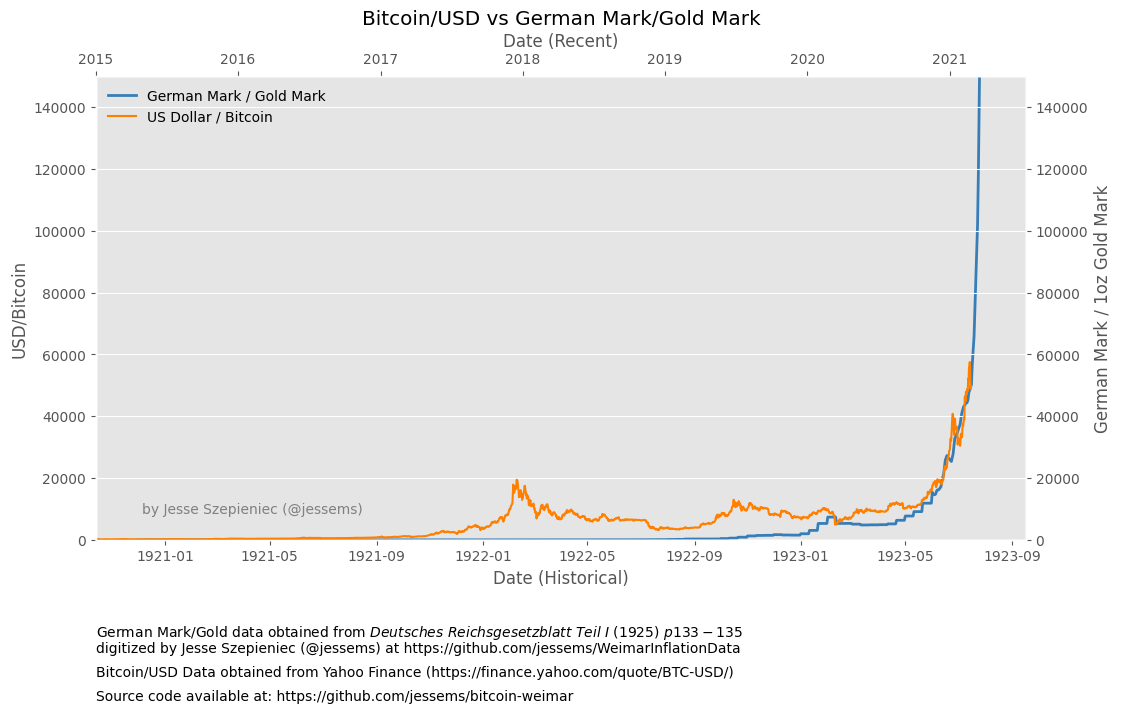

In [499]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)

ax2 = ax1.twinx()
ax2.set_ylabel("German Mark / 1oz Gold Mark")
ax2 = ax2.twiny()

ax1.plot(df_weimar_clean.loc['1920-12-01':'1923-07-30'], '-', color="#377eb8", linewidth=2, label='German Mark / Gold Mark')
ax2.plot(btc_data['Close'], '-', color="#ff7f00", label='US Dollar / Bitcoin')

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines + lines2, labels + labels2, loc=0, frameon=False)

ax1.grid(False)
ax2.grid(False)

ax1.set_xlabel("Date (Historical)")
ax1.set_ylabel("USD/Bitcoin")
ax2.set_xlabel("Date (Recent)")

ax2.set_xlim('2015-01-01', '2021-07-15')

ax1.set_ylim(0, 1.5e5)
ax2.set_ylim(0, 1.5e5)

ax2.text(0.05, 0.05, 'by Jesse Szepieniec (@jessems)',
        horizontalalignment='left',
        verticalalignment='bottom',
        color="gray",
        transform=ax2.transAxes)

plt.title('Bitcoin/USD vs German Mark/Gold Mark')

text_btc = "Bitcoin/USD Data obtained from Yahoo Finance (https://finance.yahoo.com/quote/BTC-USD/)"
text_weimar = "German Mark/Gold data obtained from $\it{Deutsches\ Reichsgesetzblatt\ Teil\ I\ (1925)\ p133-135}$"
text_weimar_2 = "digitized by Jesse Szepieniec (@jessems) at https://github.com/jessems/WeimarInflationData"
text_source = "Source code available at: https://github.com/jessems/bitcoin-weimar"

fig.text(0.125, .10, text_source, ha='left')
fig.text(0.125, .13, text_btc, ha='left')
fig.text(0.125, .18, text_weimar, ha='left')
fig.text(0.125, .16, text_weimar_2, ha='left')

fig.subplots_adjust(bottom=0.3)

plt.savefig('bitcoin-weimar.jpg')

plt.show()

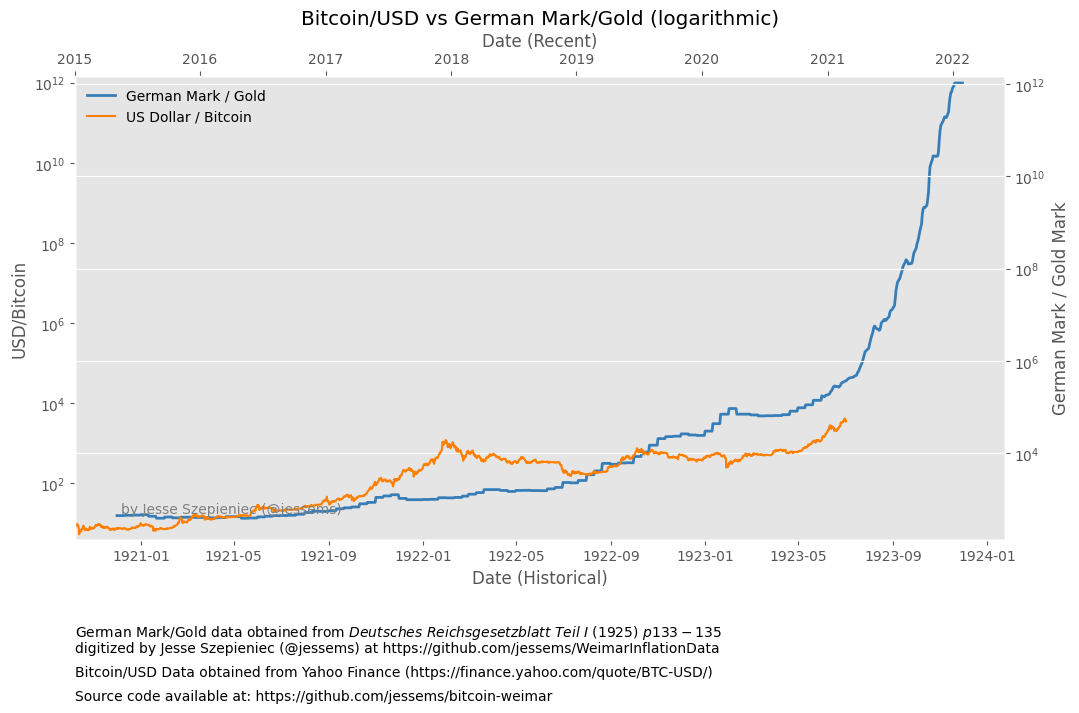

In [498]:
# Logarithmic version

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)

ax2 = ax1.twinx()
ax2.set_ylabel("German Mark / Gold Mark")
ax2 = ax2.twiny()

ax1.plot(df_weimar_clean.loc['1920-12-01':'1923-11-30'], '-', color="#377eb8", linewidth=2, label='German Mark / Gold')
ax2.plot(btc_data['Close'], '-', color="#ff7f00", label='US Dollar / Bitcoin')

ax2.set_yscale('log')
ax1.set_yscale('log')

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines + lines2, labels + labels2, loc=0, frameon=False)

ax1.grid(False)
ax2.grid(False)

ax1.set_xlabel("Date (Historical)")
ax1.set_ylabel("USD/Bitcoin")
ax2.set_xlabel("Date (Recent)")

ax2.set_xlim('2015-01-01', '2022-06-01')

ax1.set_ylim(0, 1.5e12)
ax2.set_ylim(0, 1.5e12)

ax2.text(0.05, 0.05, 'by Jesse Szepieniec (@jessems)',
        horizontalalignment='left',
        verticalalignment='bottom',
        color="gray",
        transform=ax2.transAxes)




plt.title('Bitcoin/USD vs German Mark/Gold (logarithmic)')

text_btc = "Bitcoin/USD Data obtained from Yahoo Finance (https://finance.yahoo.com/quote/BTC-USD/)"
text_weimar = "German Mark/Gold data obtained from $\it{Deutsches\ Reichsgesetzblatt\ Teil\ I\ (1925)\ p133-135}$"
text_weimar_2 = "digitized by Jesse Szepieniec (@jessems) at https://github.com/jessems/WeimarInflationData"
text_source = "Source code available at: https://github.com/jessems/bitcoin-weimar"

fig.text(0.125, .10, text_source, ha='left')
fig.text(0.125, .13, text_btc, ha='left')
fig.text(0.125, .18, text_weimar, ha='left')
fig.text(0.125, .16, text_weimar_2, ha='left')

fig.subplots_adjust(bottom=0.3)

plt.savefig('bitcoin-weimar-logarithmic.jpg')

plt.show()